## Imports

In [14]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [18]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    tx=dt/dx
    ty=dt/dy
    for it in range(nt):
        #for i in range(nx): un[i] = u[i]
        for j in range(1, row-1):
            for i in range(1, col-1):
                u[j, i] = u[j, i] - u[j, i]* tx * (u[j, i] - u[j-1, i]) \
                        - v[j, i] * ty * (u[j, i] - u[j, i-1])
                v[j, i] = v[j, i] - u[j, i]* tx * (v[j, i] - v[j-1, i]) \
                        - v[j, i] * ty * (v[j, i] - v[j, i-1])
                
        u[0, :] = 1
        u[row-1, :] = 1
        u[:, 0] = 1
        u[:, col-1] = 1
        
        v[0, :] = 1
        v[row-1, :] = 1
        v[:, 0] = 1
        v[:, col-1] = 1
    return 0

## Numba accelerator

In [20]:
def solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    tx=dt/dx
    ty=dt/dy
    for it in range(nt):
        #for i in range(nx): un[i] = u[i]
        for j in range(1, row-1):
            for i in range(1, col-1):
                u[j, i] = u[j, i] - u[j, i]* tx * (u[j, i] - u[j-1, i]) \
                        - v[j, i] * ty * (u[j, i] - u[j, i-1])
                v[j, i] = v[j, i] - u[j, i]* tx * (v[j, i] - v[j-1, i]) \
                        - v[j, i] * ty * (v[j, i] - v[j, i-1])
                
        u[0, :] = 1
        u[row-1, :] = 1
        u[:, 0] = 1
        u[:, col-1] = 1
        
        
        v[0, :] = 1
        v[row-1, :] = 1
        v[:, 0] = 1
        v[:, col-1] = 1
    return 0

## Pyccel accelerator

In [21]:
def solve_2d_nonlinearconv_pyccel(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    tx=dt/dx
    ty=dt/dy
    for it in range(nt):
        #for i in range(nx): un[i] = u[i]
        for j in range(1, row-1):
            for i in range(1, col-1):
                u[j, i] = u[j, i] - u[j, i]* tx * (u[j, i] - u[j-1, i]) \
                        - v[j, i] * ty * (u[j, i] - u[j, i-1])
                v[j, i] = v[j, i] - u[j, i]* tx * (v[j, i] - v[j-1, i]) \
                        - v[j, i] * ty * (v[j, i] - v[j, i-1])
                
        u[0, :] = 1
        u[row-1, :] = 1
        u[:, 0] = 1
        u[:, col-1] = 1
        
        
        v[0, :] = 1
        v[row-1, :] = 1
        v[:, 0] = 1
        v[:, col-1] = 1
    return 0

## Inputs

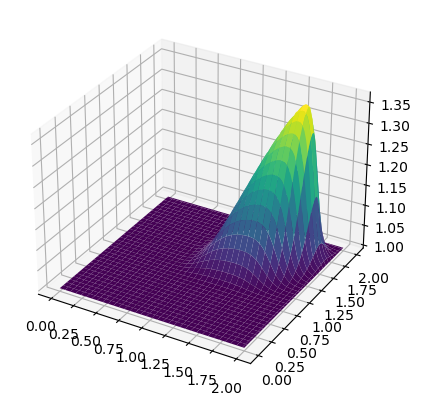

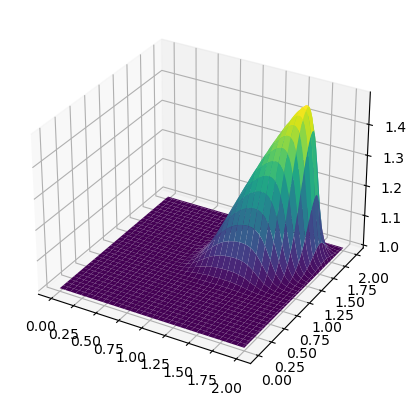

In [22]:
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

## Call Funtions

### Pure function

In [17]:
%timeit solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

3.46 s ± 60 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [8]:
%timeit solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c)

4.32 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [9]:
solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel)

In [10]:
%timeit solve_2d_nonlinearconv_f90(u, un, v, vn, nt, dt, dx, dy, c)

2.37 ms ± 58.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
